In [2]:
import pdb
import sys
import argparse
import pickle
from itertools import cycle

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sys.path.insert(0, '../../..')
from theory.capacity import capacity

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load and process data

In [3]:
# Panel a: Full network sim, mean-field sim
datapath1 = "data/data_a_net.2.npy"
datapath2 = "data/data_a_mf.npy"
# Panel c: Capacity curve, mean-field points, insets
datapath3 = "data/data_b.npy"
datapath4 = "data/data_b_mf.theta_%.2f_sigma_%.2f_P_%i.npy"
datapath5 = "data/data_b_insets.npy"
# Panel b: Final pattern mean-field correlation
datapath6 = "data/data_c.theta_%.2f_sigma_%.2f_P_%i_alpha_%i.npy"

**Panel a**: Full network and mean-field overlaps

In [4]:
M, overlaps1, overlaps2 = np.load(datapath1, allow_pickle=True)
m_mf, _, _ = np.load(datapath2, allow_pickle=True)

**Panel c**: Capacity 

In [5]:
# Analytic capacity curve
(mu_, sigma_c), alpha_c = np.load(open(datapath3, "rb"), allow_pickle=True)

# Mean-field capacity curve (selected points)
P = 64
theta_b = [0.2,0,-0.2]
sigma_b = np.arange(0.05,0.35,0.05)
alpha_mf_panel_b = []
for theta in theta_b:
    for sigma in sigma_b:
        theta, sigma, P, alpha = np.load(datapath4%(theta,sigma,P), allow_pickle=True)
        alpha_mf_panel_b.append([theta, sigma, alpha])

# Network simulation insets
correlations1, correlations2 = np.load(datapath5, allow_pickle=True)

**Panel b**: Final pattern correlation

In [6]:
theta = 0.22
sigma = 0.1
P = [8, 16, 32, 64, 128]
S = np.arange(1,25,2)
alpha = S*8/200.
correlations_panel_c = np.zeros((len(P),len(alpha)))
for i in range(len(P)):
    for j in range(len(alpha)):
        try:
            m, M, rbar = np.load(datapath6%(theta,sigma,P[i],j), allow_pickle=True)
            rho = m / np.sqrt(M-rbar**2)
            correlations_panel_c[i,j] = rho[-1,:].max()
        except:
            raise RuntimError("Could not load data file")

Plotting

0.22 0.1 0.4721503898621557


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


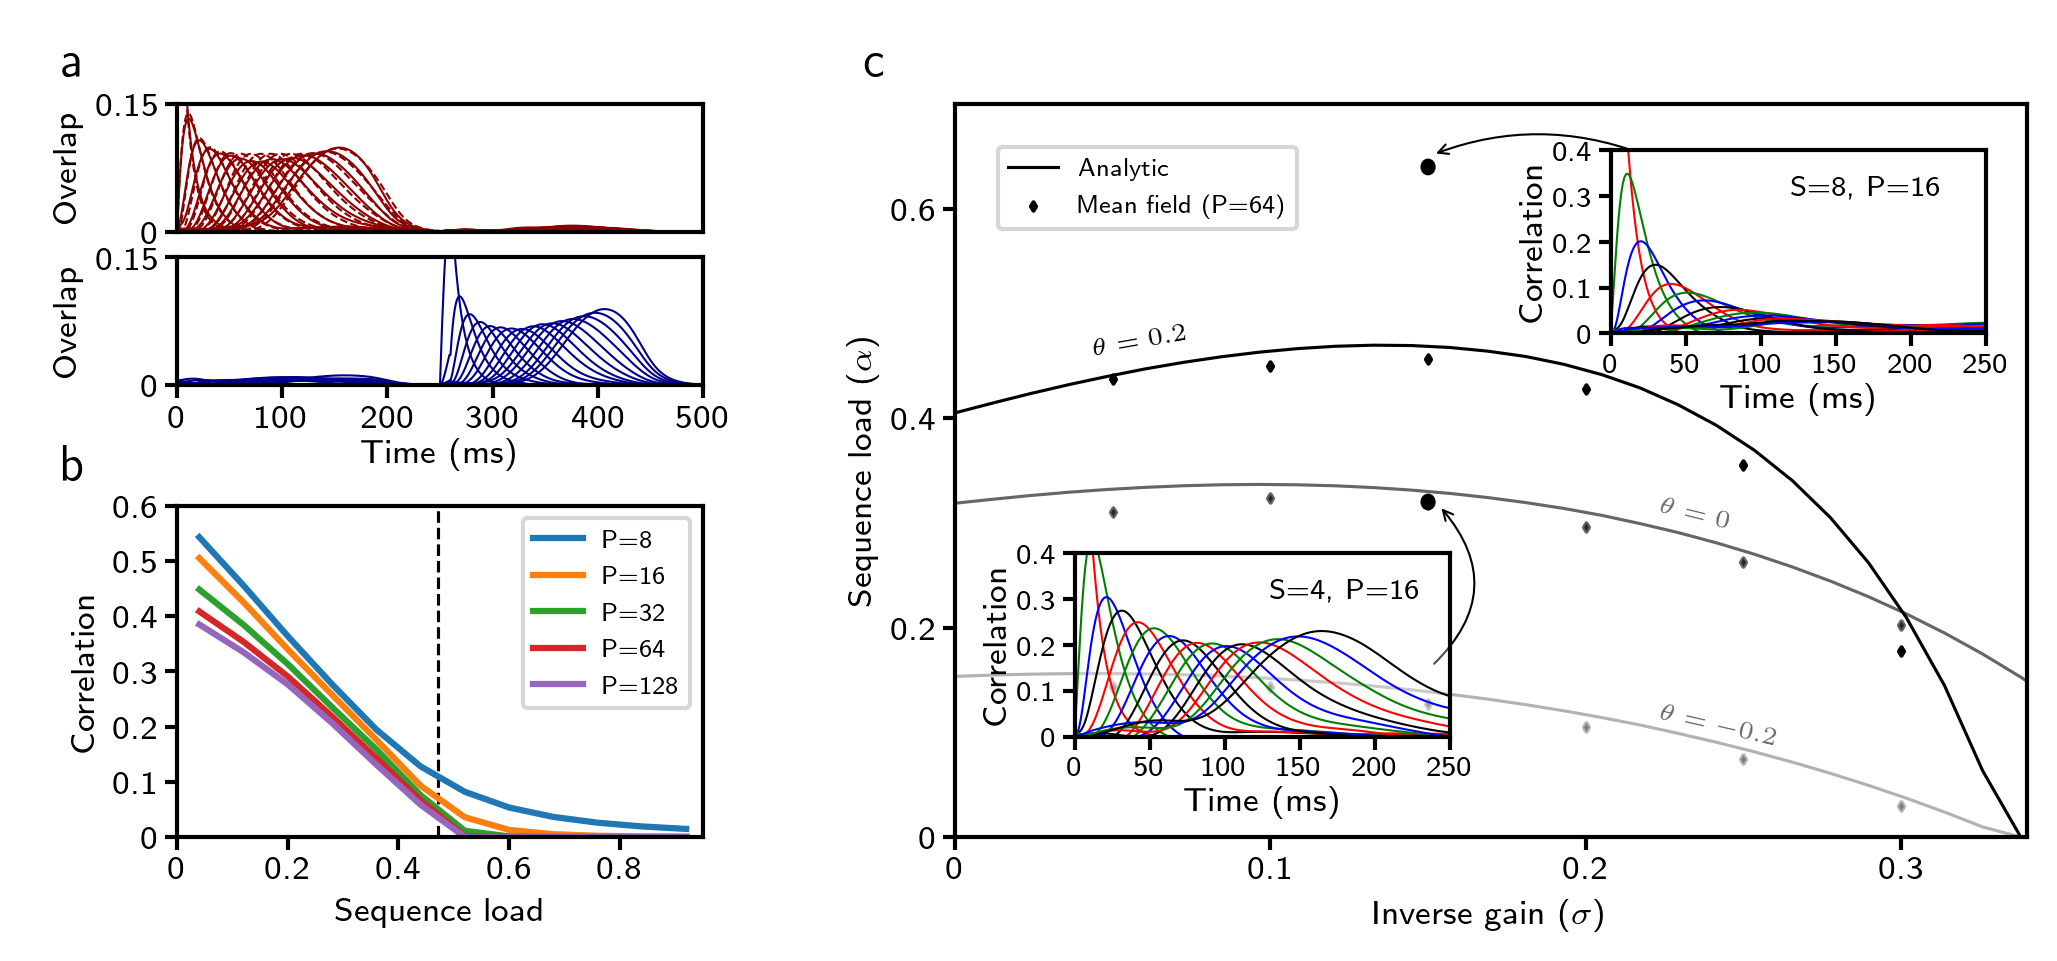

In [7]:
pu.figure_setup()
fig_size = pu.get_fig_size(17.8, 8.5)
fig = plt.figure(figsize=fig_size, dpi=300)

# Custom tick and label properties
inset_tick_fontsize = 7
inset_label_fontsize = 7
inset_labelpad = 1
labelpad = 3

# Panel a
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.10, right=0.35, bottom=0.6, wspace=0.00)
ax1 = plt.subplot(gs1[0, :])
ax2 = plt.subplot(gs1[1, :])
ax1.annotate("a", xy=(0.03,0.92), xycoords='figure fraction', fontsize=12)

# Panel b
gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.10, right=0.35, top=0.48, wspace=0.00)
ax3 = plt.subplot(gs2[:, :])
ax3.annotate("b", xy=(0.03,0.50), xycoords='figure fraction', fontsize=12)

# Panel c
gs3 = gridspec.GridSpec(3, 3)
gs3.update(left=0.47, right=0.98, hspace=0.05)
ax4 = plt.subplot(gs3[:, :])
ax4.annotate("c", xy=(0.42,0.92), xycoords='figure fraction', fontsize=12)

# Panel b, inset bottom
ax5 = inset_axes(ax4, width="100%", height="100%",
                   bbox_to_anchor=(.1, .12, .35, .25),
                   bbox_transform=ax4.transAxes, loc=3)

# Panel b, inset top
ax6 = inset_axes(ax4, width="100%", height="100%",
                   bbox_to_anchor=(.6, .67, .35, .25),
                   bbox_transform=ax4.transAxes, loc=3)

# Panel a
for overlap in overlaps1:
    ax1.plot(overlap, color='darkred', linewidth=0.5)
for overlap in m_mf:
    ax1.plot(overlap, color='darkred', linewidth=0.5, linestyle='dashed')
for overlap in overlaps2:
    ax2.plot(overlap, color='darkblue', linewidth=0.5)
ax1.set_xticks([])
ax1.set_ylabel("Overlap", labelpad=labelpad)
ax1.set_xlim([0,500])
ax1.set_yticks([0,0.15])
ax1.set_yticklabels([0,0.15])
ax1.set_ylim([0,0.15])
ax2.set_xlabel("Time (ms)", labelpad=1)
ax2.set_ylabel("Overlap", labelpad=labelpad)
ax2.set_xticks([0,100,200,300,400,500])
ax2.set_xticklabels([0,100,200,300,400,500])
ax2.set_xlim([0,500])
ax2.set_yticks([0,0.15])
ax2.set_yticklabels([0,0.15])
ax2.set_ylim([0,0.15])

# Panel c
pt1 = (0.2, 0.15, 0.64) # alpha = 8*16/(40000*0.005)
pt2 = (0.2, 0.15, 0.32) # alpha = 4*16/(40000*0.005)
for n, (alpha, a) in enumerate(zip(alpha_c, [0.3,0.6,1])): 
    if n == 2:
        label = "Analytic"
    else:
        label = ""
    ax4.plot(sigma_c[::-1], alpha[::-1], 'k', linewidth=0.75, alpha=a, label=label)

for n, (theta, sigma, alpha) in enumerate(alpha_mf_panel_b):
    label = ""
    if theta == 0.2:
        if sigma == 0.2:
            label = "Mean field (P=64)"
        alpha_ = 1
    elif theta == 0:
        alpha_ = 0.6
    elif theta == -0.2:
        alpha_ = 0.3
    else:
        print("Unknown theta", theta)
    ax4.scatter([sigma],[alpha], c='k', s=2, alpha=alpha_, marker='d', label=label)

ax4.text(0.223, 0.091, r"$\theta=-0.2$", alpha=0.6, rotation=-13)
ax4.text(0.223, 0.295, r"$\theta=0$", alpha=0.6, rotation=-14)
ax4.text(0.043, 0.460, r"$\theta=0.2$", rotation=10)
ax4.set_ylabel(r"Sequence load ($\alpha$)", labelpad=labelpad)
ax4.set_xlabel(r"Inverse gain ($\sigma$)", labelpad=labelpad)
ax4.set_xticks([0,0.1,0.2,0.3])
ax4.set_xticklabels([0,0.1,0.2,0.3])
ax4.set_xlim([0,0.34])
ax4.set_yticks([0,0.2,0.4,0.6])#,0.8])
ax4.set_yticklabels([0,0.2,0.4,0.6])#,0.8])
ax4.set_ylim([0,0.7])
circle1 = Ellipse((pt1[1], pt1[2]), color='black', width=0.0035, height=0.012)
circle2 = Ellipse((pt2[1], pt2[2]), color='black', width=0.0035, height=0.012)
ax4.add_patch(circle1)
ax4.add_patch(circle2)
ax4.legend(loc=(0.04,0.83))

# Panel c, inset bottom
ax5.set_ylabel("Correlation", labelpad=inset_labelpad)
ax5.set_xlabel("Time (ms)", labelpad=inset_labelpad)
ax5.set_yticks([0,0.1,0.2,0.3,0.4])
ax5.set_yticklabels([0,0.1,0.2,0.3,0.4], fontsize=inset_label_fontsize)
ax5.set_ylim([0,0.4])
ax5.set_xticks(range(0,300,50))
ax5.set_xticklabels(range(0,300,50), fontsize=inset_label_fontsize)
ax5.set_xlim([0,250])
ax5.text(130, 0.30, "S=4, P=16", fontsize=inset_label_fontsize)
for overlap, color in zip(correlations1, cycle(['r', 'g', 'b', 'k'])):
    ax5.plot(overlap, color, linewidth=0.5)
ax4.annotate(
    '',
    xy=(pt2[1] + 0.0025, pt2[2]),
    xycoords='data',
    xytext=(0.15, 0.16),
    textcoords='data',
    arrowprops=dict(arrowstyle="->", linewidth=0.5, connectionstyle="arc3,rad=.5"))
ax5.patch.set_alpha(0.3)

# Panel c, inset top
ax6.set_ylabel("Correlation", labelpad=inset_labelpad)
ax6.set_xlabel("Time (ms)", labelpad=inset_labelpad)
ax6.set_yticks([0,0.1,0.2,0.3,0.4])
ax6.set_yticklabels([0,0.1,0.2,0.3,0.4], fontsize=inset_label_fontsize)
ax6.set_ylim([0,0.4])
ax6.set_xticks(range(0,300,50))
ax6.set_xticklabels(range(0,300,50), fontsize=inset_label_fontsize)
ax6.set_xlim([0,250])
ax6.text(120, 0.30, "S=8, P=16", fontsize=inset_label_fontsize)
for overlap, color in zip(correlations2, cycle(['r', 'g', 'b', 'k'])):
    ax6.plot(overlap, color, linewidth=0.5)
ax4.annotate(
    '',
    xy=(pt1[1], pt1[2] + 0.01),
    xycoords='data',
    xytext=(0.22, 0.65),
    textcoords='data',
    arrowprops=dict(arrowstyle="->", linewidth=0.5, connectionstyle="arc3,rad=.2"))

# Panel b
ax3.set_xlabel("Sequence load", labelpad=labelpad)
ax3.set_ylabel("Correlation", labelpad=labelpad)
ax3.set_xticks([0,0.2,0.4,0.6,0.8])
ax3.set_xticklabels([0,0.2,0.4,0.6,0.8])
ax3.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax3.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax3.set_ylim([0,0.6])
ax3.set_xlim([0,0.95])
alpha_line = capacity(np.asarray([0.22]), np.asarray([0.1]))
ax3.axvline(x=alpha_line[0], ymin=0.0, color='k', linewidth=0.75, linestyle='dashed')
P = [8, 16, 32, 64, 128]
S = np.arange(1,25,2)
alpha = S*8/200.

for n, row in enumerate(correlations_panel_c[:]):
    ax3.plot(alpha, row, label="P=%i"%P[n])

ax3.legend()

# inset and spines
axes_inset = [ax5, ax6]
for n, ax in enumerate(axes_inset):
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='both', which='major', labelsize=8, width=1.0, length=3, pad=1.5)
    [i.set_linewidth(1.0) for i in ax.spines.values()]
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(inset_tick_fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(inset_tick_fontsize)

axes = [ax1, ax2, ax3, ax4]
for n, ax in enumerate(axes):
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='both', which='major', labelsize=8, width=1.0, length=3, pad=1.5)
    [i.set_linewidth(1.0) for i in ax.spines.values()]

plt.subplots_adjust(left=0.25, bottom=0.15)
plt.savefig("../output/3.pdf", dpi=300);